In [1]:
import streamlit as st
import pickle
import numpy as np 
import pandas as pd
import plotly.express as px



In [2]:
#load the cleaned data from pickle:
def load_data():
    with open('cleandata.pkl', 'rb') as file:
        df = pd.DataFrame(pickle.load(file))
    return (df)

df = load_data()
df.head()



,Country,EdLevel,YearsCodePro,Salary
0,Sweden,No bachelors,4.0,51552.0
1,Spain,Bachelors,5.0,46482.0
2,Germany,No bachelors,6.0,77290.0
3,Turkey,Bachelors,2.0,17748.0
4,Canada,Bachelors,6.0,46135.0


In [3]:
mean_by_country = df.groupby(['Country'])["Salary"].mean().sort_values(ascending=True)
mean_by_country = pd.DataFrame(mean_by_country)
mean_by_country.reset_index(inplace=True)
mean_by_country.sort_values("Country")


,Country,Salary
14,Australia,78334.857531
1,Brazil,27294.220841
13,Canada,74064.182590
8,France,47593.630542
11,Germany,64679.234245
0,India,23394.849075
17,Israel,109359.158924
3,Italy,34877.752672
10,Netherlands,60808.965340
15,Norway,80013.925000


In [4]:
#median by country
mean_by_country = df.groupby(['Country'])["Salary"].median().sort_values(ascending=True)
mean_by_country = pd.DataFrame(mean_by_country)
mean_by_country.reset_index(drop=True)
mean_by_country.sort_values("Salary")
mean_by_country["Salary"] = mean_by_country['Salary'].astype(int)
mean_by_country


,Salary
Country,
India,20105
Brazil,24744
Turkey,25644
Italy,33510
Russia,33972
Poland,36444
Other,36708
Spain,37834
France,45401


In [5]:
#code for showing salary progression by years of experience per country:
#load the model:

#loading the model:
def load_model():
    with open("saved_steps.pk1", 'rb') as file:
        data = pickle.load(file)
    return(data)

#load the data
data = load_model()
model = data['model']
column_encoder2 = data['column_encoder']
scaler_pickle = data['scaler']


#the prediction method
def predict(country, education, years_of_experience):
    input = [[country, education, int(years_of_experience)]]
    cols = ['Country', 'EdLevel', 'YearsCodePro']
    input = pd.DataFrame(input, columns= cols)
    input = pd.DataFrame(column_encoder2.transform(input).toarray())
    result = model.predict(input)
    result = scaler_pickle.inverse_transform(result.reshape(-1,1))
    return(result[0][0])


def display_salary_prog(country,edLevel, max_year):
    model = load_model()
    #get the data for each year:
    salary = {}
    for i in range(max_year+1):
        salary[i] = predict(country, edLevel, i)
    return(salary)

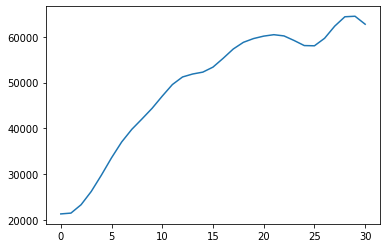

In [6]:
salaries = display_salary_prog("Other", 'Bachelors', 30)
import matplotlib.pyplot as plt
x,y = range(len(salaries)), salaries.values()
plt.plot(x,y)


In [7]:
#method for comparing salaries across countries:
#single comparison:

def display_salary_prog(country,edLevel, max_year):
    model = load_model()
    #get the data for each year:
    salary = {}
    for i in range(max_year+1):
        salary[i] = predict(country, edLevel, i)
    return(salary)



def compare_salaries(countries, edLevel, year):
    salary = {}
    for i in range(len(countries)):
        salary[countries[i]] = int(predict(countries[i], edLevel, year))
    return(salary)



def compare_salary_progression(countries, edLevel, years):
    salary = []
    for i in countries:
        for j in range(years+1):
            builder = []
            predicted = predict(i, edLevel, j)
            builder.extend((i, j, predicted))
            print(builder)
            salary.append(builder)
    return(pd.DataFrame(salary, columns=('Country', 'Experience', 'Salary')))



def single_year_multiple_countries(countries, year, edLevel):
    result = {}
    for i in countries:
        pred_sal = predict(i, year, edLevel)
        result[i] = (pred_sal)
    result = pd.DataFrame.from_dict(result, orient = 'index')
    result = result.reset_index(drop = False)
    result.columns = ['Country', 'Salary']
    return result
        

In [8]:
countries = ['Other', 'Brazil', 'Canada']
edu, year = "No bachelors", 5

a = single_year_multiple_countries(countries, edu, year)
a

,Country,Salary
0,Other,35867.985744
1,Brazil,22633.368499
2,Canada,67994.625027


In [9]:
fig = px.bar(a, color='Country')
fig.show()

In [10]:
countries = ['Other', 'Brazil', 'Canada']
edLevel, year = "Post-grad", 5
a = (compare_salary_progression(countries, edLevel, year))


['Other', 0, 37126.57624508718]
['Other', 1, 37665.6018314608]
['Other', 2, 38587.83844874156]
['Other', 3, 40192.7092638567]
['Other', 4, 43067.6533762731]
['Other', 5, 47163.29069130981]
['Brazil', 0, 33081.888411483356]
['Brazil', 1, 31262.886756561777]
['Brazil', 2, 30127.562541858242]
['Brazil', 3, 29919.752825778356]
['Brazil', 4, 30902.107412820696]
['Brazil', 5, 32755.536745967605]
['Canada', 0, 56998.11307945254]
['Canada', 1, 62216.408736552374]
['Canada', 2, 67298.93482447772]
['Canada', 3, 71847.45438071401]
['Canada', 4, 76051.42052870666]
['Canada', 5, 80030.95908280351]


In [11]:
a.sort_values(by = 'Experience')

,Country,Experience,Salary
0,Other,0,37126.576245
12,Canada,0,56998.113079
6,Brazil,0,33081.888411
1,Other,1,37665.601831
13,Canada,1,62216.408737
7,Brazil,1,31262.886757
14,Canada,2,67298.934824
8,Brazil,2,30127.562542
2,Other,2,38587.838449
9,Brazil,3,29919.752826


In [12]:
countries = ['Other', 'Brazil', 'United States of America', 'Belgium', "Russia"]
edLevel, year = "Post-grad", 34
y = compare_salaries(countries, edLevel, year)
print(y)

{'Other': 70018, 'Brazil': 64076, 'United States of America': 143760, 'Belgium': 83071, 'Russia': 69597}


In [13]:
countries = ['Other', 'Brazil', 'Canada', 'United States of America']
edLevel, year = "Post-grad", 2
y = compare_salary_progression(countries, edLevel, year)
y = pd.DataFrame(y)
y.head()

['Other', 0, 37126.57624508718]
['Other', 1, 37665.6018314608]
['Other', 2, 38587.83844874156]
['Brazil', 0, 33081.888411483356]
['Brazil', 1, 31262.886756561777]
['Brazil', 2, 30127.562541858242]
['Canada', 0, 56998.11307945254]
['Canada', 1, 62216.408736552374]
['Canada', 2, 67298.93482447772]
['United States of America', 0, 87082.11808851233]
['United States of America', 1, 95075.6705864667]
['United States of America', 2, 101793.47308478871]


,Country,Experience,Salary
0,Other,0,37126.576245
1,Other,1,37665.601831
2,Other,2,38587.838449
3,Brazil,0,33081.888411
4,Brazil,1,31262.886757


In [14]:
print(len(y))

12


In [15]:
cols = ['col'+ str(i+1) for i in range(len(y))]

In [17]:
cols = st.columns(len(y))

In [18]:
fig = px.line(y, x = 'Experience', y = 'Salary', color="Country", markers= True)
fig.show()


In [19]:
import plotly.express as px
fig = px.bar(y, x = "Country", y = 'Salary', 
            color_discrete_sequence= px.colors.sequential.Plasma_r, color = 'Salary', height= 1000)
fig.show()

In [ ]:
def twoSum(nums, target):
    # List to store results
    result = []
    # Dictionary to store the difference and its index
    index_map = {}
    # Loop for each element
    for i, n in enumerate(nums):
        # Difference which needs to be checked
        difference = target - n
        if difference in index_map:
            result.append(i)
            print(index_map)
            result.append(index_map[difference])
            print(result)
            break
        else:
            index_map[n] = i
    return result
